In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [38]:
def create_dataframe(path):
    total_df = pd.DataFrame()
    folders = os.listdir(path)
    for folder in folders:
        files = os.listdir(os.path.join(path, folder))
        for file in files:
            if file.endswith(".json"):
                df = pd.read_json(os.path.join(path,folder,file))
                total_df = pd.concat([total_df,df])
    return  total_df

total_df = create_dataframe("s3s")

In [39]:
total_df.head(4)

,id,fechaCaptura,expediente,institucionDependencia,servidorPublicoSancionado,autoridadSancionadora,tipoFalta,tipoSancion,causaMotivoHechos,resolucion,multa,inhabilitacion,observaciones,documentos,__v
0,b411f02b-5ea7-489e-93e5-9eca24d090f6,2022-05-06T00:00:00Z,CA/012/2022,"{'nombre': 'Fiscalia General del Estado', 'sig...","{'nombres': 'ANDRES', 'primerApellido': 'REYES...",DATOS NO PROPORCIONADOS,"{'clave': 'OTRO', 'valor': 'OTRO'}","[{'clave': 'I', 'valor': 'INHABILITADO'}]",DATOS NO PROPORCIONADOS,"{'url': 'DATOS NO PROPORCIONADOS', 'fechaResol...","{'monto': 0, 'moneda': {'clave': 'MXN', 'valor...","{'plazo': '3 MESES', 'fechaInicial': '2022-02-...",NaN,NaN,NaN
1,65b3929d-b116-4ba8-9eb6-398baca819fb,2022-05-07T00:00:00Z,CA/001/2022,"{'nombre': 'Fiscalia General del Estado', 'sig...","{'nombres': 'KARINA LIZBETH', 'primerApellido'...",DATOS NO PROPORCIONADOS,"{'clave': 'OTRO', 'valor': 'OTRO'}","[{'clave': 'I', 'valor': 'INHABILITADO'}]",DATOS NO PROPORCIONADOS,"{'url': 'DATOS NO PROPORCIONADOS', 'fechaResol...","{'monto': 0, 'moneda': {'clave': 'MXN', 'valor...","{'plazo': '3 MESES', 'fechaInicial': '2021-12-...",NaN,NaN,NaN
2,b6766222-8804-47f2-b008-f9d693f9133c,2022-05-08T00:00:00Z,CA/007/2022,"{'nombre': 'Fiscalia General del Estado', 'sig...","{'nombres': 'VENAMAR', 'primerApellido': 'RAMO...",DATOS NO PROPORCIONADOS,"{'clave': 'OTRO', 'valor': 'OTRO'}","[{'clave': 'I', 'valor': 'INHABILITADO'}]",DATOS NO PROPORCIONADOS,"{'url': 'DATOS NO PROPORCIONADOS', 'fechaResol...","{'monto': 0, 'moneda': {'clave': 'MXN', 'valor...","{'plazo': '3 MESES', 'fechaInicial': '2022-02-...",NaN,NaN,NaN
3,67bf0c34-1899-4185-9aba-7a1c03bd142b,2022-05-09T00:00:00Z,CA/011/2022,"{'nombre': 'Fiscalia General del Estado', 'sig...","{'nombres': 'BRENDA GUADALUPE', 'primerApellid...",DATOS NO PROPORCIONADOS,"{'clave': 'OTRO', 'valor': 'OTRO'}","[{'clave': 'I', 'valor': 'INHABILITADO'}]",DATOS NO PROPORCIONADOS,"{'url': 'DATOS NO PROPORCIONADOS', 'fechaResol...","{'monto': 0, 'moneda': {'clave': 'MXN', 'valor...","{'plazo': '3 MESES', 'fechaInicial': '2022-02-...",NaN,NaN,NaN


## Resolucion

In [40]:
resoluciones = []
for index,row in total_df.iterrows():
    resolucion = row['resolucion']
    if(type(resolucion) != float):
        if('sentido' in resolucion):
            resoluciones.append(resolucion['sentido'])
        else:
            resoluciones.append("Dato no proporcionado")
    else:
        resoluciones.append("Dato no proporcionado")

print(f"Existen {len(np.unique(resoluciones))} resoluciones diferentes")
for resolucion in np.unique(resoluciones):
    print(f"---- {resolucion}")

Existen 1 resoluciones diferentes
---- Dato no proporcionado


## institucionDependencia

In [41]:
institucionesDependencia = []
for index,row in total_df.iterrows():
    institucionDependencia = row['institucionDependencia']
    if(type(institucionDependencia) != float):
        if('nombre' in institucionDependencia):
            institucionesDependencia.append(institucionDependencia['nombre'])
        else:
            institucionesDependencia.append("Dato no proporcionado")
    else:
        institucionesDependencia.append("Dato no proporcionado")

print(f"Existen {len(np.unique(institucionesDependencia))} de instituciones dependencia diferentes")
for institucionDependencia in np.unique(institucionesDependencia):
    print(f"---- {institucionDependencia}")

Existen 644 de instituciones dependencia diferentes
----  Dirección de Servicios Públicos Municipales de Benito Juárez Quintana Roo
---- ADMINISTRACION FEDERAL DE SERVICIOS EDUCATIVOS EN EL DISTRITO FEDERAL
---- ADMINISTRACION PORTUARIA INTEGRAL DE GUAYMAS S.A. DE C.V
---- ADMINISTRACION PORTUARIA INTEGRAL DE TAMPICO S.A. DE C.V
---- ADMINISTRACIÓN REGIONAL DE CUERNAVACA MORELOS
---- ADSCRITA AL AYUNTAMIENTO DE AHUACATLÁN, PUEBLA
---- AEROPUERTOS Y SERVICIOS AUXILIARES (ASA)
---- AGENCIA METROPOLITANA DE BOSQUER URBANOS DEL AMG
---- AGROASEMEX S.A
---- APOYOS Y SERVICIOS A LA COMERCIALIZACION AGROPECUARIA
---- AUDITORÍA SUPERIOR DEL ESTADO
---- AUDITORÍA SUPERIOR DEL ESTADO DE GUERRERO
---- AYUNTAMIENTO DE AHUATLAN, PUEBLA
---- AYUNTAMIENTO DE AHUEHUETITLA, PUEBLA
---- AYUNTAMIENTO DE AMIXTLAN, PUEBLA
---- AYUNTAMIENTO DE ATZITZIHUACÁN, PUEBLA, ADMINISTRACIÓN 2011-2014
---- AYUNTAMIENTO DE CHIAUTLA, PUEBLA.
---- AYUNTAMIENTO DE CHICHIQUILA, PUEBLA
---- AYUNTAMIENTO DE CORONANGO PUEBLA 

## Autoridades sancionadoras

In [42]:
autoridades_sancionadoras = []
for index,row in total_df.iterrows():
    autoridad_sancionadora = row['autoridadSancionadora']
    if (type(autoridad_sancionadora) != float):
        autoridades_sancionadoras.append(autoridad_sancionadora)
    else:
        autoridades_sancionadoras.append("Dato no proporcionado")


print(f"Existen {len(np.unique(autoridades_sancionadoras))} autoridades sancionadoras diferentes")
for autoridad in np.unique(autoridades_sancionadoras):
    print(f"---- {autoridad}")

Existen 237 autoridades sancionadoras diferentes
---- 426
---- 427
---- AUDITORÍA SUPERIOR DEL ESTADO DE PUEBLA
---- Autoridad Resolutora OIC CEDHJ
---- Ayuntamiento de Guadalajara
---- Ayuntamiento de Ocotlán
---- Ayuntamiento de Tecolotlán
---- Ayuntamiento de Tlajomulco
---- Ayuntamiento de Tonalá
---- Ayuntamiento de Zapopan
---- COMISARIA DE LA CONTRALORIA DEL ESTADO DE PUEBLA EN LA COMISION ESTATAL DE AGUA Y SANEAMIENTO DE PUEBLA
---- COMISARIA EN LA COMISION ESTATAL DE AGUA Y SANEAMIENTO DE PUEBLA 
---- COMISARÍA PÚBLICA DE LA SECRETARÍA DE LA CONTRALORÍA EN EL INSTITUTO DE CAPACITACIÓN PARA EL TRABAJO DEL ESTADO DE PUEBLA
---- COMISARÍA PÚBLICA EN EL ORGANISMO PÚBLICO DESCENTRALIZADO DENOMINADO "CONVENCIONES Y PARQUES"
---- COMISION DE DISCIPLINA DEL CONSEJO DE LA JUDICATURA FEDERAL
---- COMISION DE HONOR Y JUSTICIA
---- COMISION DISCIPLINARIA DEL CONSEJO DE LA JUDICATURA FEDERAL
---- COMISIÓN DE DISCIPLINA DEL CONSEJO DE LA JUDICATURA FEDERAL
---- COMISIÓN DE DISCIPLINA DEL CO

## Faltas

In [51]:

faltas = []
for index,row in total_df.iterrows():
    falta = row['tipoFalta']
    if (type(falta) != float):
        if('clave' in falta):
            faltas.append(unidecode(falta['clave'].lower()))
        else:
            faltas.append("Dato no proporcionado")
    else:
        faltas.append("Dato no proporcionado")

print(f"Existen {len(np.unique(faltas))} faltas diferentes")
for falta in np.unique(faltas):
    print(f"---- {falta}")

Existen 19 faltas diferentes
---- 
---- abci
---- afn
---- ag
---- ang
---- asex
---- aut
---- cex
---- drp
---- dsct
---- hsex
---- idsp
---- nad
---- ojust
---- otro
---- pec
---- vdh
---- vlnp
---- vpc


## Sanciones

In [44]:
sanciones = []
for index,row in total_df.iterrows():
    tipo_sanciones = row['tipoSancion']
    if(type(tipo_sanciones) != float):
        for tipo in tipo_sanciones:
            if('clave' in tipo):
                sanciones.append(unidecode(tipo['clave']))
            else:
                sanciones.append("Dato no proporcionado")
    else:
        sanciones.append("Dato no proporcionado")

print(f"Existen {len(np.unique(sanciones))} sanciones diferentes, y cada sancionado puede tener una lista de estas")
for sancion in np.unique(sanciones):
    print(f"---- {sancion}")

# destitución, los 3 ejemplos como uno, inhabilitación los dos ejemplos como uno, multado = sancion economica, suspension

'''
I = INHABILITADO
M = MULTADO
S= SUSPENSIÓN DEL EMPLEO, CARGO O COMISIÓN
D= DESTITUCIÓN DEL EMPLEO, CARGO O COMISIÓN
O= OTRO
IRSC= INDEMNIZACIÓN RESARCITORIA
SE= SANCIÓN ECONÓMICA'''

Existen 12 sanciones diferentes, y cada sancionado puede tener una lista de estas
---- A
---- APR
---- APU
---- AS
---- C
---- D
---- I
---- IRSC
---- M
---- O
---- S
---- SE


'\nI = INHABILITADO\nM = MULTADO\nS= SUSPENSIÓN DEL EMPLEO, CARGO O COMISIÓN\nD= DESTITUCIÓN DEL EMPLEO, CARGO O COMISIÓN\nO= OTRO\nIRSC= INDEMNIZACIÓN RESARCITORIA\nSE= SANCIÓN ECONÓMICA'

## Estadísticas multa


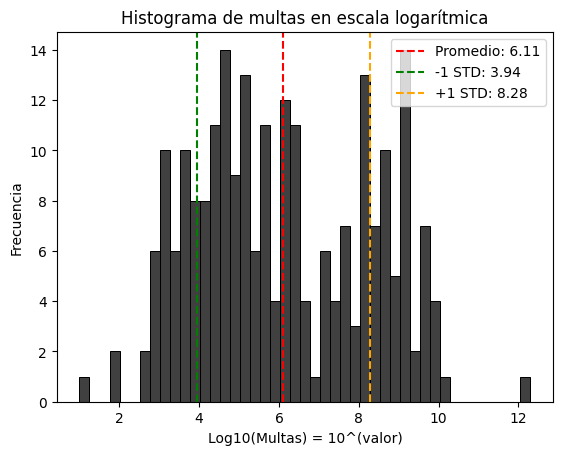

In [45]:
multas = []
for index,row in total_df.iterrows():
    multa = row['multa']
    if(type(multa) != float):
        if('monto' in multa):
            if(multa['monto'] is not None):
                multas.append(multa['monto'])

multas = np.array(multas)
multas = multas[np.where(multas > 0)]
log_multas = np.log10(multas)

promedio_log = np.mean(log_multas)
std_log = np.std(log_multas)
# Crear el histograma
plt.figure()
sns.histplot(log_multas, bins=45, color='black')
plt.axvline(promedio_log, color='red', linestyle='--', label=f'Promedio: {promedio_log:.2f}')
plt.axvline(promedio_log - std_log, color='green', linestyle='--', label=f'-1 STD: {promedio_log - std_log:.2f}')
plt.axvline(promedio_log + std_log, color='orange', linestyle='--', label=f'+1 STD: {promedio_log + std_log:.2f}')

# Personalizar el gráfico
plt.title("Histograma de multas en escala logarítmica")
plt.xlabel("Log10(Multas) = 10^(valor)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## Inhabilitación

C:\Users\uma_i\AppData\Local\Temp\ipykernel_34652\3839631354.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fechaInicial = pd.to_datetime(inhabilitacion['fechaInicial'])
C:\Users\uma_i\AppData\Local\Temp\ipykernel_34652\3839631354.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fechaFinal = pd.to_datetime(inhabilitacion['fechaFinal'])


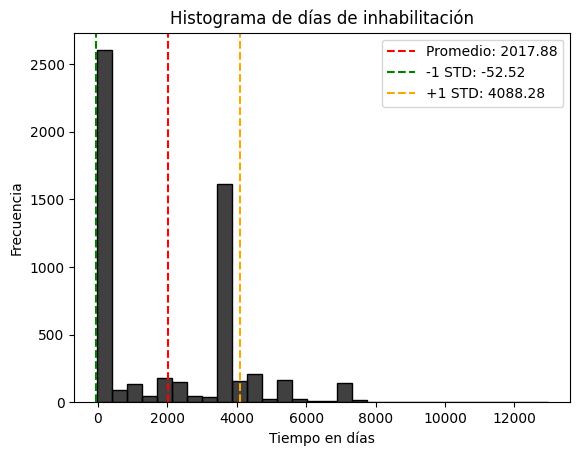

In [46]:
duraciones = []
for index,row in total_df.iterrows():
    inhabilitacion = row['inhabilitacion']
    if(type(inhabilitacion) != float):
        if('fechaInicial' in inhabilitacion and 'fechaFinal' in inhabilitacion and 'plazo' in inhabilitacion):
            if(inhabilitacion['fechaInicial'] != "-" and inhabilitacion['fechaInicial'] != " " and inhabilitacion['fechaFinal'] != "-" and inhabilitacion['fechaFinal'] != " "):
                try:
                    fechaInicial = pd.to_datetime(inhabilitacion['fechaInicial'])
                    fechaFinal = pd.to_datetime(inhabilitacion['fechaFinal'])
                    duracion = (fechaFinal - fechaInicial).days
                    if(type(duracion) != float):
                        duraciones.append(duracion)
                except Exception as e:
                    pass
            elif(inhabilitacion['plazo'] != 'Dato no proporcionado'):
                duraciones.append(inhabilitacion['plazo'])


promedio = np.mean(duraciones)
std = np.std(duraciones)
plt.figure()
sns.histplot(duraciones, bins=30, color='black')
plt.axvline(promedio, color='red', linestyle='--', label=f'Promedio: {promedio:.2f}')
plt.axvline(promedio - std, color='green', linestyle='--', label=f'-1 STD: {promedio - std:.2f}')
plt.axvline(promedio + std, color='orange', linestyle='--', label=f'+1 STD: {promedio + std:.2f}')

# Personalizar el gráfico
plt.title("Histograma de días de inhabilitación")
plt.xlabel("Tiempo en días")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## Causa - Motivos - Hechos


In [47]:
causasMotivosHechos = []
for index,row in total_df.iterrows():
    causa = row['causaMotivoHechos']
    if (type(causa) != float):
        causasMotivosHechos.append(unidecode(causa.lower()))
    else:
        causasMotivosHechos.append("Dato no proporcionado")


print(f"Existen {len(np.unique(causasMotivosHechos))} causasMotivosHechos diferentes")
for causa in np.unique(causasMotivosHechos):
    if(len(causa) < 200):
        print(f"---- {causa}")

Existen 263 causasMotivosHechos diferentes
----  checado de tarjetones
---- abando de guardia
---- abusar indebidamente en el ejercicio de su empleo.
---- abuso de autoridad
---- abuso de funciones
---- abuso de funciones, 
---- abuso de funciones, cohecho, 
---- abuso de funciones, peculado, 
---- acoso sexual
---- acta de entrega-recepcion de manera extemporanea
---- acto de entrega-recepcion de manera extemporanea 
---- actuar bajo conflicto de interes, 
---- actuar bajo conflicto de interes, enriquecimiento oculto u ocultamiento de conflicto de interes, 
---- adjudicacion directa de contratos de prestacion de servicios

---- adjudicacion directa de contratos de prestacion de servicios.
---- administrativamente responsable de faltas administrativas
---- agresiones verbales y fisicas a una companera
---- al realizar servicios de mantenimiento y reparacion vehicular con proveedores que no se encuentran registrados en el comite de adquisiciones del poder ejecutivo (cadpe)
---- aprobo y

In [48]:
text = '\n'.join(causasMotivosHechos)

# Tokenización de las palabras
words = word_tokenize(text.lower())  # Convertir a minúsculas para normalizar

# Filtrar las stopwords
stop_words = set(stopwords.words('spanish'))  # Usar el idioma español
filtered_words = [unidecode(word) for word in words if word.isalpha() and word not in stop_words]

# Contar las palabras más frecuentes
word_counts = Counter(filtered_words)
# incumplimiento de .... debido a cohecho .... declaración (2+6 / 2 = 4)
# Mostrar las 10 palabras más comunes
for x in word_counts.most_common(100):
    print(x)

('patrimonial', 3274)
('declaracion', 3274)
('situacion', 3115)
('incumplimiento', 3091)
('administrativa', 2347)
('negligencia', 2341)
('violacion', 529)
('abuso', 495)
('presupuestal', 412)
('leyes', 409)
('normatividad', 409)
('autoridad', 359)
('funciones', 173)
('cohecho', 169)
('publicos', 169)
('servidores', 132)
('extorsion', 131)
('delito', 127)
('cometido', 127)
('contratacion', 124)
('procedimientos', 115)
('presentacion', 86)
('extemporanea', 77)
('presentar', 65)
('conclusion', 61)
('omiso', 59)
('recursos', 54)
('modificacion', 49)
('ejercicio', 45)
('publico', 43)
('intereses', 43)
('omision', 41)
('encargo', 39)
('cargo', 38)
('publica', 38)
('tiempo', 35)
('forma', 33)
('mil', 32)
('datos', 29)
('proporcionados', 27)
('requerimientos', 27)
('cuenta', 27)
('parte', 26)
('dos', 25)
('servicio', 25)
('desvio', 25)
('auditoria', 25)
('omitio', 22)
('dec', 22)
('pat', 22)
('conc', 22)
('realizo', 21)
('municipio', 21)
('pesos', 20)
('conflicto', 20)
('cumplir', 20)
('asi', 

# Puestos

In [49]:
puestos = []
for index,row in total_df.iterrows():
    servidor = row['servidorPublicoSancionado']
    if (type(servidor) != float):
        if('puesto' in servidor):
            puestos.append(servidor['puesto'])
    else:
        puestos.append("Dato no proporcionado")


print(f"Existen {len(np.unique(puestos))} puestos diferentes")
for puesto in np.unique(puestos):
    print(f"---- {puesto}")

Existen 3059 puestos diferentes
----  Técnico A
---- .
---- 12 AÑOS
---- 138/2019
---- 1ER SECRETARIO DEL SERV. EXT. MEX, TITULAR SECC. COM. Y TURI. EN EMBAJADA SUDAFR
---- ABOGADA
---- ABOGADA ESPECIALIZADA
---- ABOGADO
---- ABOGADO EN TURNO ADSC. A  SUBSECRETARIA JCA. CTRO. ESTATAL  REINSERCION SOCIAL
---- ABOGADO INVESTIGADOR
---- ABOGADO SP
---- ACTIVO DE PRODUCCI�N POZA RICA
---- ACTUARIA
---- ACTUARIA DE PRIMERA INSTANCIA
---- ACTUARIA JUDICIAL
---- ACTUARIO
---- ACTUARIO DE MINISTERIO PÚBLICO
---- ACTUARIO DEL MINISTERIO PÚBLICO
---- ACTUARIO FISCAL
---- ACTUARIO JUDICIAL
---- ACTUARIO JUDICIAL 
---- ACTUARIO JUDICIAL ADSCRITO AL PRIMER TRIBUNAL COLEGIADO DEL VIGESIMO CIRCUITO
---- ACTUARIO JUDICIAL. NOVENO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRATIVA. 1ER. C.
---- ACTUARIO NOTIFICADOR
---- ADMINISTRADOR
---- ADMINISTRADOR 
---- ADMINISTRADOR  SECRETARIA DE FINANZAS
---- ADMINISTRADOR "C"
---- ADMINISTRADOR DE BRIGADA
---- ADMINISTRADOR DE CCDI
---- ADMINISTRADOR DE FONDOS Y VAL

In [50]:
text = '\n'.join(puestos)

# Tokenización de las palabras
words = word_tokenize(text.lower())  # Convertir a minúsculas para normalizar

# Filtrar las stopwords
stop_words = set(stopwords.words('spanish'))  # Usar el idioma español
filtered_words = [unidecode(word) for word in words if word.isalpha() and word not in stop_words]

# Contar las palabras más frecuentes
word_counts = Counter(filtered_words)
for x in word_counts.most_common(20):
    print(x)

('auxiliar', 1100)
('jefe', 636)
('policia', 599)
('general', 515)
('director', 496)
('administrativo', 495)
('tecnico', 372)
('municipal', 329)
('operativo', 314)
('coordinador', 274)
('departamento', 251)
('especialista', 246)
('presidente', 234)
('servicios', 213)
('medico', 209)
('especializado', 191)
('b', 166)
('secretario', 146)
('subdirector', 144)
('oficina', 141)
